# Image Classification Using CNN with VGG19 Architecture !

### 1 Input Fundus Image

In [55]:
# initial data directory .
data_dir_nonaug = 'dataRETINA'

In [56]:
# labeling and resizing all of the data that'll be used .
# 0 = ROP and 1 = NonROP .
data_nonaug = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dir_nonaug, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            data_nonaug.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Jumlah image data sebelum augmentasi: {0}'.format(len(data_nonaug)))


 Jumlah image data sebelum augmentasi: 91


In [57]:
# set X and y nonaug .
X_nonaug = []
y_nonaug = []

for features, label in data_nonaug:
    X_nonaug.append(features)
    y_nonaug.append(label)
    
y_nonaug = np.array(y_nonaug)

### 2 Data Augmentation 

In [1]:
import os
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator

In [27]:
datagen = ImageDataGenerator(
        rotation_range= 2,
        width_shift_range= 0.05,
        height_shift_range= 0.05,
        zoom_range = [0.85, 1.15],
        horizontal_flip = True,
        fill_mode ='nearest')

# NonROP's augmentation .
path_NonROP = os.path.join(data_dir, 'NonROP')
for img in os.listdir(path_NonROP):
    image = load_img('dataRETINA/NonROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmented/NonROP', 
                              save_prefix='NonROP', save_format='jpg'):
        i += 1
        if i > 26:
            break
# ROP's augmentation .
path_ROP = os.path.join(data_dir, 'ROP')
for img in os.listdir(path_ROP):
    image = load_img('dataRETINA/ROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmented/ROP', 
                              save_prefix='ROP', save_format='jpg'):
        i += 1
        if i > 20:
            break

### 3 Image Preprocessing

In [47]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# new data directory .
data_dir = 'dataRETINAaugmented'

In [49]:
# checking image class .
image_class = []
for classes in os.listdir(data_dir):
    image_class.append(classes)

print('\n image class in dataRETINAaugmented directory: {}'.format(image_class))


 image class in dataRETINAaugmented directory: ['.DS_Store', 'ROP', 'NonROP', '.ipynb_checkpoints']


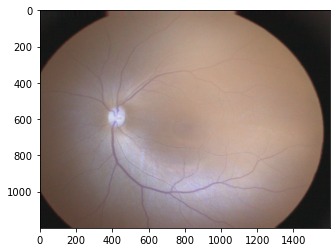


 img size =  (1200, 1600, 3)


In [50]:
# checking input data by showing the image .
categories = ['ROP', 'NonROP']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
print('\n img size = ', img_array.shape)

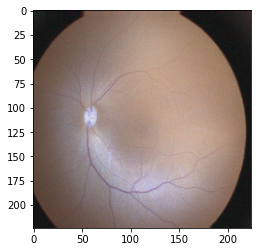


 img size =  (224, 224, 3)


In [51]:
# example of resizing image .
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()
print('\n img size = ', new_array.shape)

In [52]:
# labeling and resizing all of data that'll be used .
# 0 = ROP and 1 = NonROP .
data = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Jumlah image data yang akan digunakan: {0}'.format(len(data)))


 Jumlah image data yang akan digunakan: 2124


In [53]:
# set X and y aug .
X_aug = []
y_aug = []

for features, label in data:
    X_aug.append(features)
    y_aug.append(label)
    
y_aug = np.array(y_aug)

---Dataset SEBELUM Augmentasi---


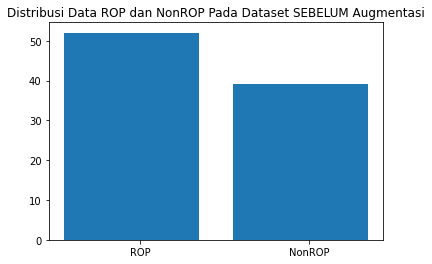


 Jumlah data ROP pada dataset SEBELUM augmentasi: 52

 Jumlah data NonROP pada dataset SEBELUM augmentasi: 39


---Dataset SETELAH Augmentasi---


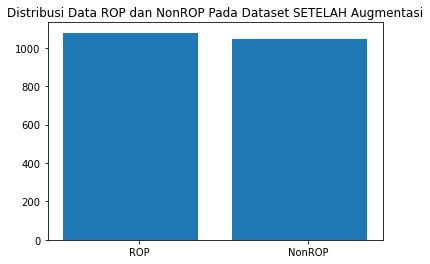


 Jumlah data ROP pada dataset SETELAH augmentasi: 1078

 Jumlah data NonROP pada dataset SETELAH augmentasi: 1046




In [61]:
# before vs after augmentation data visualization .
a_nonaug = 0; b_nonaug = 0; c_aug = 0; d_aug = 0

for i in range(len(y_nonaug)):
    if y_nonaug[i] == 0:
        a_nonaug += 1
    else:
        b_nonaug += 1
for i in range(len(y_aug)):
    if y_aug[i] == 0:
        c_aug += 1
    else:
        d_aug += 1

data_nonaug = np.array([a_nonaug, b_nonaug])
data_aug = np.array([c_aug, d_aug])
dataplot_aug = [data_nonaug, data_aug]
jumlah_ROP_aug = [a_nonaug, c_aug]
jumlah_NonROP_aug = [b_nonaug, d_aug]
split_aug = ['SEBELUM', 'SETELAH']

for i in range(len(dataplot_aug)):
    positions = np.arange(2)
    plt.bar(positions, dataplot_aug[i], 0.8)
    plt.xticks(positions + 0.05, ('ROP', 'NonROP'))
    plt.title('Distribusi Data ROP dan NonROP Pada Dataset {} Augmentasi'.format(split_aug[i]))
    print('---Dataset {0} Augmentasi---'.format(split[i]))
    plt.show()
    print('\n Jumlah data ROP pada dataset {0} augmentasi: {1}'.format(split_aug[i], jumlah_ROP_aug[i]))
    print('\n Jumlah data NonROP pada dataset {0} augmentasi: {1}'.format(split_aug[i], jumlah_NonROP_aug[i]))
    print('\n')

### 4 Data Preparation

In [8]:
import random
import numpy as np

In [9]:
# shuffling data .
before = []
for sample in data[:10]:
    before.append(sample[1])
print('\n Data yang dipunya: {}'.format(before))

random.shuffle(data)
after = []
for sample in data[:10]:
    after.append(sample[1])
print('\n Data yang dipunya setelah shuffle: {}'.format(after))


 Data yang dipunya: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 Data yang dipunya setelah shuffle: [0, 1, 0, 0, 0, 0, 1, 0, 0, 1]


In [10]:
# set X and y .
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [11]:
# Normalization .
X = X/255.0

### 5 Data Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# defining the ratio of train-val-test data .
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

# splitting data into train-val-test data .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (1 - train_ratio), random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_ratio/(test_ratio + val_ratio), random_state = 1) 

---Training Dataset---


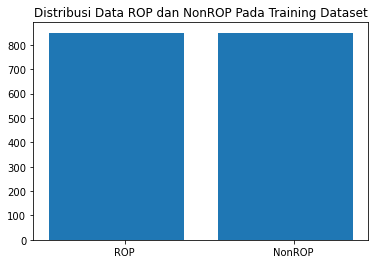


 Jumlah data ROP pada Training dataset: 849

 Jumlah data NonROP pada Training dataset: 850


---Validation Dataset---


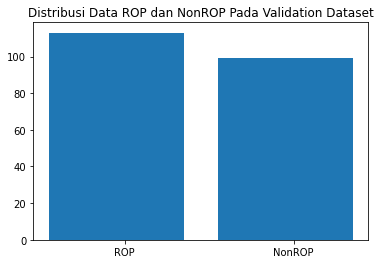


 Jumlah data ROP pada Validation dataset: 113

 Jumlah data NonROP pada Validation dataset: 99


---Test Dataset---


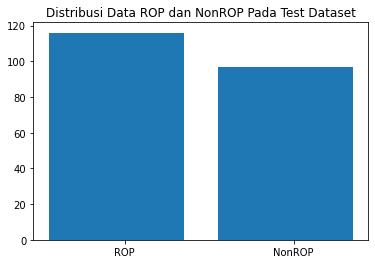


 Jumlah data ROP pada Test dataset: 116

 Jumlah data NonROP pada Test dataset: 97




In [14]:
# data distribution visualization .
a = 0; b = 0; c = 0; d = 0; e = 0; f = 0

for i in range(len(y_train)):
    if y_train[i] == 0:
        a += 1
    else:
        b += 1
for i in range(len(y_val)):
    if y_val[i] == 0:
        c += 1
    else:
        d += 1
for i in range(len(y_test)):
    if y_test[i] == 0:
        e += 1
    else:
        f += 1

data1 = np.array([a, b])
data2 = np.array([c, d])
data3 = np.array([e, f])
dataplot = [data1, data2, data3]
jumlah_ROP = [a, c, e]
jumlah_NonROP = [b, d, f]
split = ['Training', 'Validation', 'Test']

for i in range(len(dataplot)):
    positions = np.arange(2)
    plt.bar(positions, dataplot[i], 0.8)
    plt.xticks(positions + 0.05, ('ROP', 'NonROP'))
    plt.title('Distribusi Data ROP dan NonROP Pada {} Dataset'.format(split[i]))
    print('---{0} Dataset---'.format(split[i]))
    plt.show()
    print('\n Jumlah data ROP pada {0} dataset: {1}'.format(split[i], jumlah_ROP[i]))
    print('\n Jumlah data NonROP pada {0} dataset: {1}'.format(split[i], jumlah_NonROP[i]))
    print('\n')

### 6 Modelling and Training Model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# callbacks for model .
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)
model_checkpoint = ModelCheckpoint('best_ROP_model.hdf5', save_best_only = True)

In [50]:
# optimizer .
opt = Adam(learning_rate=2*(10**(-5)))

# VGG19 Architecture .
model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), activation ='relu', input_shape = X.shape[1:], padding='same'))
model.add(Conv2D(64, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Block 2
model.add(Conv2D(128, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Block 3
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

# Block 4
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Block 5
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(4096, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation ='relu'))

model.add(Dense(2, activation ='softmax'))

model.compile(optimizer = opt,
              loss ='sparse_categorical_crossentropy',
              metrics =['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs = 20, 
                    batch_size = 32, 
                    validation_data=(X_val, y_val), 
                    callbacks = [monitor_val_acc, model_checkpoint])

Epoch 1/20
54/54 [==============================] - 1044s 19s/step - loss: 0.6927 - accuracy: 0.5009 - val_loss: 0.6900 - val_accuracy: 0.5094
Epoch 2/20
54/54 [==============================] - 750s 14s/step - loss: 0.6873 - accuracy: 0.5338 - val_loss: 0.6874 - val_accuracy: 0.5094
Epoch 3/20
54/54 [==============================] - 4093s 77s/step - loss: 0.6714 - accuracy: 0.5974 - val_loss: 0.6885 - val_accuracy: 0.5613
Epoch 4/20
54/54 [==============================] - 10405s 196s/step - loss: 0.6648 - accuracy: 0.6057 - val_loss: 0.6179 - val_accuracy: 0.6651
Epoch 5/20
54/54 [==============================] - 6564s 123s/step - loss: 0.6185 - accuracy: 0.6516 - val_loss: 0.5469 - val_accuracy: 0.7123
Epoch 6/20
54/54 [==============================] - 815s 15s/step - loss: 0.5765 - accuracy: 0.6869 - val_loss: 0.5652 - val_accuracy: 0.6792
Epoch 7/20
54/54 [==============================] - 754s 14s/step - loss: 0.5017 - accuracy: 0.7387 - val_loss: 0.4230 - val_accuracy: 0.7547

### 7 Model's Evaluation

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
# model summary .
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

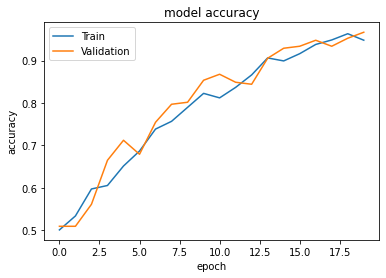

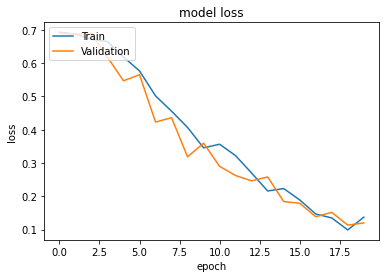

In [51]:
# history for accuracy .
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# history for loss .
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
# target data .
print('\n y_test = {}'.format(y_test))

# model prediction .
y_model = model.predict(X_test)
y_pred = np.argmax(y_model, axis = 1)
print('\n y_pred = {}'.format(y_pred))


 y_test = [1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0]
7/7 [==============================] - 26s 4s/step

 y_pred = [1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0]


In [20]:
# evaluate model using test dataset .
model.evaluate(X_test, y_test)

7/7 [==============================] - 27s 4s/step - loss: 0.0689 - accuracy: 0.9812


[0.0688721165060997, 0.9812206625938416]

In [21]:
# classification report .
print('\n Classification Report:')
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       116
           1       0.99      0.97      0.98        97

    accuracy                           0.98       213
   macro avg       0.98      0.98      0.98       213
weighted avg       0.98      0.98      0.98       213




 Confusion Matrix:
[[115   1]
 [  3  94]]


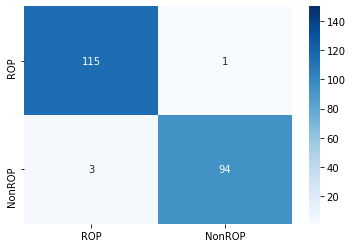

In [22]:
# confusion matrix .
print('\n Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues', vmax = 150, 
            fmt='g', xticklabels=['ROP', 'NonROP'], yticklabels=['ROP', 'NonROP'])
plt.show()

### 8 Predict New Data

In [18]:
# load saved model .
model = tf.keras.models.load_model('best_ROP_model.hdf5')

In [ ]:
# initial data directory .
data_dir = 'dataRETINA'

# produce new dataset .
datagen = ImageDataGenerator(
        rotation_range= 2,
        width_shift_range= 0.05,
        height_shift_range= 0.05,
        zoom_range = [0.85, 1.15],
        horizontal_flip = True,
        fill_mode ='nearest')

# NonROP's augmentation .
path_NonROP = os.path.join(data_dir, 'NonROP')
for img in os.listdir(path_NonROP):
    image = load_img('dataRETINA/NonROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST/NonROP', 
                              save_prefix='NonROP', save_format='jpg'):
        i += 1
        if i > 1:
            break
# ROP's augmentation .
path_ROP = os.path.join(data_dir, 'ROP')
for img in os.listdir(path_ROP):
    image = load_img('dataRETINA/ROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST/ROP', 
                              save_prefix='ROP', save_format='jpg'):
        i += 1
        if i > 1:
            break

In [63]:
# new data directory .
data_dirTEST = 'dataRETINAaugmentedTEST'

# labeling and resizing all of data that'll be used .
# 0 = ROP and 1 = NonROP .
dataTEST = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dirTEST, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            dataTEST.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Jumlah image data yang akan digunakan: {0}'.format(len(dataTEST)))


 Jumlah image data yang akan digunakan: 182


In [64]:
# shuffling data .
before = []
for sample in dataTEST[:10]:
    before.append(sample[1])
print('\n Data yang dipunya: {}'.format(before))

random.shuffle(dataTEST)
after = []
for sample in dataTEST[:10]:
    after.append(sample[1])
print('\n Data yang dipunya setelah shuffle: {}'.format(after))


 Data yang dipunya: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 Data yang dipunya setelah shuffle: [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [65]:
# set X and y .
X = []
y = []

for features, label in dataTEST:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [66]:
# Normalization .
X = X/255.0

In [67]:
# target data .
print('\n y_test = {}'.format(y))

# model prediction .
y_mod = model.predict(X)
y_predict = np.argmax(y_mod, axis = 1)
print('\n y_pred = {}'.format(y_predict))


 y_test = [0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1]
6/6 [==============================] - 23s 4s/step

 y_pred = [0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1]


In [68]:
# evaluate model using test dataset .
model.evaluate(X, y)

6/6 [==============================] - 25s 4s/step - loss: 0.0883 - accuracy: 0.9670


[0.08828351646661758, 0.9670329689979553]

In [69]:
# classification report .
print('\n Classification Report:')
print(classification_report(y, y_predict))


 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       104
           1       0.97      0.95      0.96        78

    accuracy                           0.97       182
   macro avg       0.97      0.96      0.97       182
weighted avg       0.97      0.97      0.97       182




 Confusion Matrix:
[[102   2]
 [  4  74]]


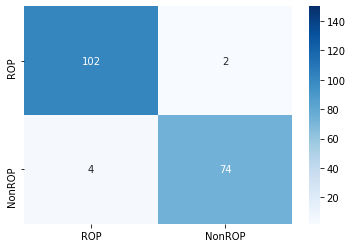

In [70]:
# confusion matrix .
print('\n Confusion Matrix:')
print(confusion_matrix(y, y_predict))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y, y_predict), annot = True, cmap='Blues', vmax = 150, 
            fmt='g', xticklabels=['ROP', 'NonROP'], yticklabels=['ROP', 'NonROP'])
plt.show()

### 9 Predict New Data 2

In [ ]:
# initial data directory .
data_dir = 'dataRETINA'

datagen = ImageDataGenerator(
        rotation_range= 2,
        width_shift_range= 0.05,
        height_shift_range= 0.05,
        zoom_range = [0.85, 1.15],
        horizontal_flip = True,
        fill_mode ='nearest')

# NonROP's augmentation .
path_NonROP = os.path.join(data_dir, 'NonROP')
for img in os.listdir(path_NonROP):
    image = load_img('dataRETINA/NonROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST2/NonROP', 
                              save_prefix='NonROP', save_format='jpg'):
        i += 1
        if i > 1:
            break
            
# ROP's augmentation .
path_ROP = os.path.join(data_dir, 'ROP')
for img in os.listdir(path_ROP):
    image = load_img('dataRETINA/ROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST2/ROP', 
                              save_prefix='ROP', save_format='jpg'):
        i += 1
        if i > 1:
            break

In [71]:
# new data directory .
data_dirTEST2 = 'dataRETINAaugmentedTEST2'

# labeling and resizing all of the data that'll be used .
# 0 = ROP and 1 = NonROP .
dataTEST2 = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dirTEST2, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            dataTEST2.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Jumlah image data yang akan digunakan: {0}'.format(len(dataTEST2)))


 Jumlah image data yang akan digunakan: 181


In [72]:
# shuffling data .
before2 = []
for sample in dataTEST2[:10]:
    before2.append(sample[1])
print('\n Data yang dipunya: {}'.format(before2))

random.shuffle(dataTEST2)
after2 = []
for sample in dataTEST2[:10]:
    after2.append(sample[1])
print('\n Data yang dipunya setelah shuffle: {}'.format(after2))


 Data yang dipunya: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 Data yang dipunya setelah shuffle: [0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [73]:
# set X and y .
X2 = []
y2 = []

for features, label in dataTEST2:
    X2.append(features)
    y2.append(label)

X2 = np.array(X2).reshape(-1, img_size, img_size, 3)
y2 = np.array(y2)

In [74]:
# Normalization .
X2 = X2/255.0

In [75]:
# target data .
print('\n y_test = {}'.format(y2))

# model prediction .
y_mod2 = model.predict(X2)
y_predict2 = np.argmax(y_mod2, axis = 1)
print('\n y_pred = {}'.format(y_predict2))


 y_test = [0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]
6/6 [==============================] - 22s 4s/step

 y_pred = [0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0]


In [76]:
# evaluate model using test dataset .
model.evaluate(X2, y2)

6/6 [==============================] - 23s 4s/step - loss: 0.0742 - accuracy: 0.9834


[0.07419317960739136, 0.9834254384040833]

In [77]:
# classification report .
print('\n Classification Report:')
print(classification_report(y2, y_predict2))


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       104
           1       0.97      0.99      0.98        77

    accuracy                           0.98       181
   macro avg       0.98      0.98      0.98       181
weighted avg       0.98      0.98      0.98       181




 Confusion Matrix:
[[102   2]
 [  1  76]]


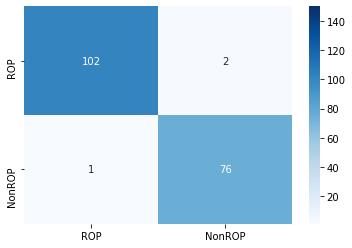

In [78]:
# confusion matrix .
print('\n Confusion Matrix:')
print(confusion_matrix(y2, y_predict2))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y2, y_predict2), annot = True, cmap='Blues', vmax = 150, 
            fmt='g', xticklabels=['ROP', 'NonROP'], yticklabels=['ROP', 'NonROP'])
plt.show()